In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
Data = pd.read_csv('income.csv')
Data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


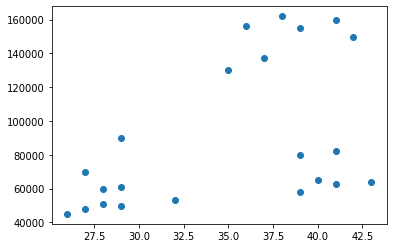

In [3]:
plt.scatter(Data['Age'],Data['Income($)'])
plt.show()

In [4]:
RR = KMeans(n_clusters=3)
RR

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
y_predicated = RR.fit_predict(Data[['Age','Income($)']])
y_predicated
# Disini kita mencluster kan hasil dari 3 kelompok di atas

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
# Selanjutnya kita akan memvisualisassikan nya
Data['Cluter'] = y_predicated
Data.head()

,Name,Age,Income($),Cluter
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No handles with labels found to put in legend.


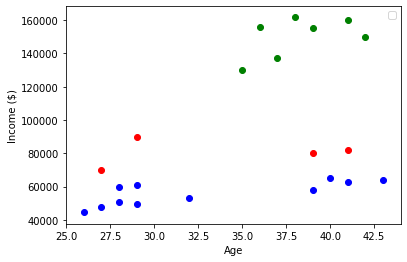

In [7]:
# Jadi kita akan mencluster kan 3 sebaran ini menjadi 1 plot
Data1 = Data[Data.Cluter==0]
Data2 = Data[Data.Cluter==1]
Data3 = Data[Data.Cluter==2]

plt.scatter(Data1.Age,Data1['Income($)'],color='red')
plt.scatter(Data2.Age,Data2['Income($)'],color='green')
plt.scatter(Data3.Age,Data3['Income($)'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

In [8]:
scaler = MinMaxScaler()
scaler.fit(Data[['Income($)']])
Data['Income($)'] = scaler.transform(Data[['Income($)']])
Data

scaler.fit(Data[['Age']])
Data[['Age']] = scaler.transform(Data[['Age']])
Data

,Name,Age,Income($),Cluter
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [9]:
# kita pakai K-Means
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(Data[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [10]:
# Selannjutnya kita kelompokan
Data['cluster'] = y_predicted
Data.drop('Cluter',axis='columns',inplace=True)
Data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [11]:
RR.cluster_centers_
# Dimana K-Means Memiliki pusat Variabel yang disebut cluster centers

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

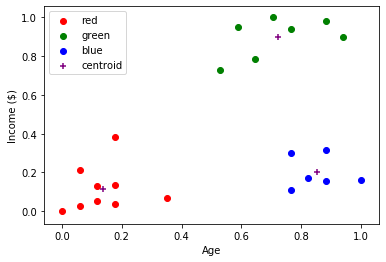

In [12]:
# lalu kita plot untuk melihat cluster
Data1 = Data[Data.cluster==0]
Data2 = Data[Data.cluster==1]
Data3 = Data[Data.cluster==2]

plt.scatter(Data1.Age,Data1['Income($)'],color='red',label='red')
plt.scatter(Data2.Age,Data2['Income($)'],color='green',label='green')
plt.scatter(Data3.Age,Data3['Income($)'],color='blue',label='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [13]:
# salanjutnya kita memakai plot siku
# SSE merupakan kesalahan kuadrat
k_rng  = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(Data[['Age','Income($)']])
    sse.append(km.inertia_)

In [14]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.2798062931046179,
 0.22443334487241418,
 0.17681044133887713,
 0.13265419827245162,
 0.10383752586603559]

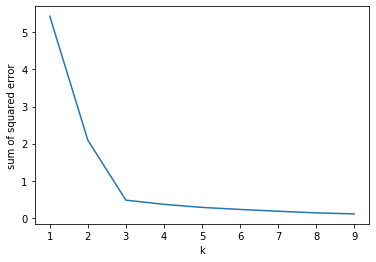

In [15]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)
plt.show()